# NLP Sentiment Analysis

In [1]:
from flair.models import TextClassifier
from flair.data import Sentence
from segtok.segmenter import split_single
import pandas as pd
import re
import collections
import math
from collections import defaultdict
# Import l necesary libraries
from wordcloud import  WordCloud, STOPWORDS, ImageColorGenerator

classifier = TextClassifier.load('en-sentiment')

2023-09-04 23:17:31,452 loading file C:\Users\soumita_kundu\.flair\models\sentiment-en-mix-distillbert_4.pt


## Pre-processing functions

In [28]:
def clean(raw):
    """ Remove hyperlinks and markup """
    #print(raw);
    result = re.sub("<[a][^>]*>(.+?)</[a]>", 'Link.', raw)
    result = re.sub('&gt;', "", result)
    result = re.sub('&#x27;', "'", result)
    result = re.sub('&quot;', '"', result)
    result = re.sub('&#x2F;', ' ', result)
    result = re.sub('<p>', ' ', result)
    result = re.sub('</i>', '', result)
    result = re.sub('&#62;', '', result)
    result = re.sub('<i>', ' ', result)
    result = re.sub("\n", '', result)
    return result

def make_sentences(text):
    """ Breaks apart text into a list of sentences """
    sentences = [sent for sent in split_single(text)]
    return sentences

def predict(sentence):
    """ Predict the sentiment of a sentence """
    if sentence == "":
        return 0
    text = Sentence(sentence) 
    #print(text);
    # stacked_embeddings.embed(text)
    classifier.predict(text)
    value = text.labels[0].to_dict()['value'] 
    
    if value == 'POSITIVE':
        result = text.to_dict()['labels'][0]['confidence']
    else:
        result = -(text.to_dict()['labels'][0]['confidence'])
    return round(result, 3)

def get_scores(sentences):
    """ Call predict on every sentence of a text """
    results = [] #list
    
    for i in range(0, len(sentences)): 
        results.append(predict(sentences[i]))
    return results

def get_sum(scores):
    
    result = round(sum(scores), 3)
    return result

## Loading data 

In [32]:
df = pd.read_json('small.json')
#print(df.shape);
df = df.dropna()#deleting NULL or empty rows
df = df.reset_index(drop=True)
df.shape #rows, columns

(96, 3)

In [33]:
df.head(10) #prints first 10 rows

,id,by,text
0,6239553,mierle,"Sorry, I messed up the link and can&#x27;t cha..."
1,6990393,skylan_q,I stopped reading this partway through because...
2,8661369,Thriptic,It&#x27;s all relative. I live close to my par...
3,6257604,losethos,C:\TAD\Text\WALDEN.TXT<p>-- &quot;Make kneaded...
4,8127271,yaronl_elh,"Not as successful as the other ones here, but ..."
5,5852300,1123581321,"It&#x27;s on the list, too, but I (possibly in..."
6,4219217,pdeuchler,Is it?<p>In my interpretation it is the conten...
7,10039848,zx2c4,"Finally, ECC memory on a laptop!"
8,5871153,md224,really curious what you mean when you say rape...
9,3324982,jayeff,When I got my current laptop about 1 1/2 years...


## Pre-processing data

In [34]:
df.text = df.text.apply(clean) 
#print(df);
df['sentences'] = df.text.apply(make_sentences)
#print(df);
df['scores'] = df['sentences'].apply(get_scores)
#print(df);
df['scores_sum'] = df.scores.apply(get_sum)
#print(df);

         id              by  \
0   6239553          mierle   
1   6990393        skylan_q   
2   8661369        Thriptic   
3   6257604        losethos   
4   8127271      yaronl_elh   
..      ...             ...   
91  4468428       encoderer   
92  5802382  douglasisshiny   
93  5938217    plywoodtrees   
94   284949   justncr3dibl3   
95  9390718      darkmighty   

                                                 text  \
0    Sorry, I messed up the link and can't change it.   
1   I stopped reading this partway through because...   
2   It's all relative. I live close to my parents,...   
3   C:\TAD\Text\WALDEN.TXT -- "Make kneaded bread ...   
4   Not as successful as the other ones here, but ...   
..                                                ...   
91  Once you move from storing session data in-mem...   
92  Spain's government finances were not unsustain...   
93  No, not true. There are government and non-gov...   
94  hmmm i wonder how many people they did this re...   


In [6]:
df.head()

,id,by,text,sentences,scores,scores_sum
0,6239553,mierle,"Sorry, I messed up the link and can't change it.","[Sorry, I messed up the link and can't change ...",[-1.0],-1.000
1,6990393,skylan_q,I stopped reading this partway through because...,[I stopped reading this partway through becaus...,"[-1.0, -0.997]",-1.997
2,8661369,Thriptic,"It's all relative. I live close to my parents,...","[It's all relative., I live close to my parent...","[-0.56, 1.0, 0.999, -0.852]",0.587
3,6257604,losethos,"C:\TAD\Text\WALDEN.TXT -- ""Make kneaded bread ...","[C:\TAD\Text\WALDEN.TXT -- ""Make kneaded bread...","[-0.88, 0.998, 0.999, 0.645, -0.998, -0.761, -...",-0.264
4,8127271,yaronl_elh,"Not as successful as the other ones here, but ...","[Not as successful as the other ones here, but...","[0.652, 0.663, 0.988, -1.0, -0.519, -0.986, 0....",0.775


In [36]:
for x in range(0, 96):
    sample, scores_sum = df.loc[x]['text'], df.loc[x]['scores_sum']
    
    if scores_sum > 2:
        print("POSITIVE SCORE:", scores_sum)
        print(sample, "\n")
    elif scores_sum < -2:
        print("NEGATIVE SCORE:", scores_sum)
        print(sample, "\n")

NEGATIVE SCORE: -4.678
When I got my current laptop about 1 1/2 years ago I didn't install an ad-blocker (or NoScript or FlashBlock) and really don't care anymore. Ads improved over the last view years. My solution for sites with crazy ad banners/skyscrapers (too colorful, too much movement or - worst of all - play sound) is simply to stop visiting them. Sidenote: If I tend  to somehow return over and over again they get an entry in /etc/hosts). And yes, pop-ups are blocked (as it's default in Chrome) 

NEGATIVE SCORE: -2.962
Apparently your internet browsing data is not enough, Google also wants your medical records and DNA. Seriously though, I wouldn't trust any company connected with Google for 'health and well being'.  Their total disregard for privacy would imply they are not working in my best interest for health either. 

NEGATIVE SCORE: -11.046
According to your graph, GINI went up (from 34 to 38%) after taxes and transfers as well.  Just because a random variable that is the a

In [38]:
df = pd.read_csv('reviews_dataset.csv')
df.shape

(3222, 9)

In [39]:
df.head()

,name,description,rating,likes_count,verified,images,reviewed_at,_id,crawled_at
0,deepa shetty,Super I loved it,5,0,True,https://images-static.nykaa.com/prod-review/16...,2021-04-05 21:18:36,cfd992f2-85bc-56a1-9577-1a8bd7ca6c82,"2021-07-31, 15:04:21"
1,Ilteeza Islam,My little brother is using it . His mother lov...,5,0,True,https://images-static.nykaa.com/prod-review/15...,2020-09-09 12:19:31,cfd992f2-85bc-56a1-9577-1a8bd7ca6c82,"2021-07-31, 15:04:21"
2,Zaneera,I've always used sebamed products for my kid. ...,5,0,True,NaN,2021-01-08 17:18:56,cfd992f2-85bc-56a1-9577-1a8bd7ca6c82,"2021-07-31, 15:04:21"
3,ANJALI SHENISHETTY,Great soaps for kids. Smells amazing too,5,1,True,NaN,2020-12-07 11:33:44,cfd992f2-85bc-56a1-9577-1a8bd7ca6c82,"2021-07-31, 15:04:21"
4,K.Latha,Nice soap with mild properties,5,1,True,NaN,2020-06-24 13:44:32,cfd992f2-85bc-56a1-9577-1a8bd7ca6c82,"2021-07-31, 15:04:21"


In [40]:
df = df[df['description'].notna()]
df.shape

(3222, 9)

In [41]:
df.description = df.description.apply(clean)
df['sentences'] = df.description.apply(make_sentences)
df['scores'] = df['sentences'].apply(get_scores)
df['scores_sum'] = df.scores.apply(get_sum)

In [42]:
df.head(20)

,name,description,rating,likes_count,verified,images,reviewed_at,_id,crawled_at,sentences,scores,scores_sum
0,deepa shetty,Super I loved it,5,0,True,https://images-static.nykaa.com/prod-review/16...,2021-04-05 21:18:36,cfd992f2-85bc-56a1-9577-1a8bd7ca6c82,"2021-07-31, 15:04:21",[Super I loved it],[0.988],0.988
1,Ilteeza Islam,My little brother is using it . His mother lov...,5,0,True,https://images-static.nykaa.com/prod-review/15...,2020-09-09 12:19:31,cfd992f2-85bc-56a1-9577-1a8bd7ca6c82,"2021-07-31, 15:04:21",[My little brother is using it . His mother lo...,"[0.997, 0]",0.997
2,Zaneera,I've always used sebamed products for my kid. ...,5,0,True,NaN,2021-01-08 17:18:56,cfd992f2-85bc-56a1-9577-1a8bd7ca6c82,"2021-07-31, 15:04:21",[I've always used sebamed products for my kid....,"[1.0, 0.997]",1.997
3,ANJALI SHENISHETTY,Great soaps for kids. Smells amazing too,5,1,True,NaN,2020-12-07 11:33:44,cfd992f2-85bc-56a1-9577-1a8bd7ca6c82,"2021-07-31, 15:04:21","[Great soaps for kids., Smells amazing too]","[0.993, 0.999]",1.992
4,K.Latha,Nice soap with mild properties,5,1,True,NaN,2020-06-24 13:44:32,cfd992f2-85bc-56a1-9577-1a8bd7ca6c82,"2021-07-31, 15:04:21",[Nice soap with mild properties],[1.0],1.000
5,Mahzooma Ibrahim,Fragrance is nice and as always a good product...,5,0,True,NaN,2019-11-29 11:05:46,cfd992f2-85bc-56a1-9577-1a8bd7ca6c82,"2021-07-31, 15:04:21",[Fragrance is nice and as always a good produc...,"[0.999, 0]",0.999
6,Archna Nangia,The soap is very gentle on the skin.Does not m...,5,0,True,NaN,2021-07-27 00:17:44,cfd992f2-85bc-56a1-9577-1a8bd7ca6c82,"2021-07-31, 15:04:21",[The soap is very gentle on the skin.Does not ...,[0.998],0.998
7,Vallari vasishtha,Good and very mild soap gor baby's soft skin. ...,5,0,True,NaN,2021-06-07 10:43:12,cfd992f2-85bc-56a1-9577-1a8bd7ca6c82,"2021-07-31, 15:04:21",[Good and very mild soap gor baby's soft skin....,"[0.998, 0.995]",1.993
8,ishwarya atyam,After using it will be very smooth for baby sk...,5,0,True,NaN,2021-05-24 22:08:00,cfd992f2-85bc-56a1-9577-1a8bd7ca6c82,"2021-07-31, 15:04:21",[After using it will be very smooth for baby s...,[1.0],1.000
9,Nidhi Bembi,Product is really very gentle on skin,5,0,True,NaN,2021-04-17 22:24:45,cfd992f2-85bc-56a1-9577-1a8bd7ca6c82,"2021-07-31, 15:04:21",[Product is really very gentle on skin],[0.995],0.995


In [43]:
df = df.drop_duplicates('description', keep='last')

In [44]:
df.shape

(2420, 12)

In [45]:
df.head()

,name,description,rating,likes_count,verified,images,reviewed_at,_id,crawled_at,sentences,scores,scores_sum
0,deepa shetty,Super I loved it,5,0,True,https://images-static.nykaa.com/prod-review/16...,2021-04-05 21:18:36,cfd992f2-85bc-56a1-9577-1a8bd7ca6c82,"2021-07-31, 15:04:21",[Super I loved it],[0.988],0.988
1,Ilteeza Islam,My little brother is using it . His mother lov...,5,0,True,https://images-static.nykaa.com/prod-review/15...,2020-09-09 12:19:31,cfd992f2-85bc-56a1-9577-1a8bd7ca6c82,"2021-07-31, 15:04:21",[My little brother is using it . His mother lo...,"[0.997, 0]",0.997
2,Zaneera,I've always used sebamed products for my kid. ...,5,0,True,NaN,2021-01-08 17:18:56,cfd992f2-85bc-56a1-9577-1a8bd7ca6c82,"2021-07-31, 15:04:21",[I've always used sebamed products for my kid....,"[1.0, 0.997]",1.997
3,ANJALI SHENISHETTY,Great soaps for kids. Smells amazing too,5,1,True,NaN,2020-12-07 11:33:44,cfd992f2-85bc-56a1-9577-1a8bd7ca6c82,"2021-07-31, 15:04:21","[Great soaps for kids., Smells amazing too]","[0.993, 0.999]",1.992
4,K.Latha,Nice soap with mild properties,5,1,True,NaN,2020-06-24 13:44:32,cfd992f2-85bc-56a1-9577-1a8bd7ca6c82,"2021-07-31, 15:04:21",[Nice soap with mild properties],[1.0],1.000


In [46]:
# Append multiple value to a key in dictionary
def add_values_in_dict(sample_dict, key, list_of_values):
    """Append multiple values to a key in the given dictionary"""
    if key not in sample_dict:
        sample_dict[key] = list()
    sample_dict[key].append(list_of_values)
    return sample_dict

In [47]:
df.columns

Index(['name', 'description', 'rating', 'likes_count', 'verified', 'images',
       'reviewed_at', '_id', 'crawled_at', 'sentences', 'scores',
       'scores_sum'],
      dtype='object')

In [48]:
df.reset_index(drop=True, inplace=True)

In [49]:
df.iloc[158]

name                                                 Jiya Haldar
description                        Good baby oil for gentle skin
rating                                                         5
likes_count                                                    1
verified                                                    True
images         https://images-static.nykaa.com/prod-review/16...
reviewed_at                                  2020-12-01 16:10:04
_id                         92b0a3dd-6aed-56f3-a19f-4f96055c1993
crawled_at                                  2021-07-31, 15:05:35
sentences                        [Good baby oil for gentle skin]
scores                                                   [0.998]
scores_sum                                                 0.998
Name: 158, dtype: object

In [50]:
df.loc[157]['description'], df.loc[157]['scores_sum']

('I still use this oil for my body be it summer or winter. Its light weight non sticky. For removing mascara. Sometimes as face oil in the night skin care. For my dry knees and elbows. Its perfect no chemical, no harm.',
 2.246)

In [52]:
countPos=0;
countNeg=0;
posReviewDict={}
negReviewDict={}
posReviewsList=[]
negReviewsList=[]
for x in range(0, len(df)):
    sample, scores_sum = df.loc[x]['description'], df.loc[x]['scores_sum']
    sample_scores=dict()
    if scores_sum >=0:
        countPos+=1
        sample_scores[scores_sum]=sample;
        posReviewsList.append(sample)
        posReviewDict = add_values_in_dict(posReviewDict, scores_sum, sample)
    elif scores_sum < 0:
        countNeg+=1
        sample_scores[scores_sum]=sample;
        negReviewsList.append(sample)
        negReviewDict = add_values_in_dict(negReviewDict, scores_sum, sample)

posReviewDict = collections.OrderedDict(sorted(posReviewDict.items(), reverse=True))
negReviewDict = collections.OrderedDict(sorted(negReviewDict.items()))
#print(posReviewDict);

In [22]:
print("Top 10 positive reviews are---->>")
i=0
for key, values in posReviewDict.items():
    if(i<10):
        print("Scores sum---->>",key)
        print("Review---->")
        for v in range(len(values)):
            print(values[v],"\n");
        i+=1

Top 10 positive reviews are---->>
Scores sum---->> 9.843
Review---->
This is a bottle full of goodness. My facial skin sometimes become itchy during the winters  and this product helped my skin a lot. I use it as a toner. I've ordered two bottles of it from Nykaa. This is so good. It not only helps your skin to calm and relax, it heals it from within. I'm using it regularly and trust me its worth every penny. I love this thermal spring water so much. Every skin type can use it including sensitive. This has become my favourite in no time.  

Scores sum---->> 8.898
Review---->
I started using this product in my third month of pregnancy and have no marks on my tummy. I used it diligently twice a day, once in the morning post a shower and once at bedtime, by massaging it into the skin. I noticed that when applied once, the lotion keeps the skin moisturized for the entire day, even when your clothes rub against your skin all day. As your pregnancy progresses, the skin on your tummy becomes 

In [23]:
print("Top 10 negative reviews are---->>")
i=0
for key, values in negReviewDict.items():
    if(i<10):
        print("Scores sum---->>",key)
        print("Review---->")
        for v in range(len(values)):
            print(values[v],"\n");
        i+=1

Top 10 negative reviews are---->>
Scores sum---->> -4.999
Review---->
These pads have adhesive only on one side and are not strong to enough to stick. They tend to move around a lot, which is quite irritating and uncomfortable. I have to keep adjusting them to prevent leakage. Expensive product - not worth. Disappointing 

Scores sum---->> -4.993
Review---->
Make my hair very dry..  Frizzy....  Not buying it ever.... Itchy scalp....  Dont buy. 

Scores sum---->> -4.99
Review---->
Very worst product not smooth at all don't use on your baby definitely... Just smell is good but again it's very strong whereas.. Baby powder should never smell strong as much as i know.. Please don't waste your many on these powder not worth at all.. Himalaya n Johnson are way more better than this one.. 

Scores sum---->> -4.0
Review---->
Very poor quality and these are very small in size. Also super flimsy, they'll bend if you use a bit of pressure. Won't recommend. Save your money for better ones. 

Scores

In [24]:
print("Total positive reviews",countPos)

Total positive reviews 2121


In [25]:
print("Total positive reviews",countNeg)

Total positive reviews 299


In [26]:
# Get stopwords from wordcloud library
stopwords = set(STOPWORDS)

In [27]:
print(stopwords)

{'same', 'does', 'few', "mustn't", 'ourselves', 'her', 'and', 'who', 'am', 'its', "that's", "wasn't", "don't", 'ours', "they've", 'into', 'their', 'me', "aren't", 'by', "i'm", 'that', 'while', 'between', 'or', "she'd", 'were', 'own', "where's", 'each', 'once', 'ought', 'so', 'such', 'than', "we'd", 'from', "she'll", 'could', 'up', "you've", 'shall', 'down', "who's", "can't", 'too', 'but', 'themselves', 'did', 'since', 'very', "he'll", 'theirs', "couldn't", 'for', "when's", 'itself', 'had', 'http', 'most', 'she', 'then', "he's", 'www', 'otherwise', 'no', 'nor', 'them', 'of', "they're", 'until', "they'd", 'yourselves', 'being', 'his', 'else', 'which', 'we', "shouldn't", 'where', 'have', "i've", 'if', 'i', 'both', 'your', 'our', "we'll", 'some', 'at', 'below', 'over', 'hers', 'here', 'get', 'would', 'in', 'when', 'not', 'having', 'com', 'as', "wouldn't", "how's", 'these', 'cannot', "shan't", 'hence', 'out', 'r', 'also', "won't", 'any', 'further', "weren't", 'has', 'off', "doesn't", 'yours

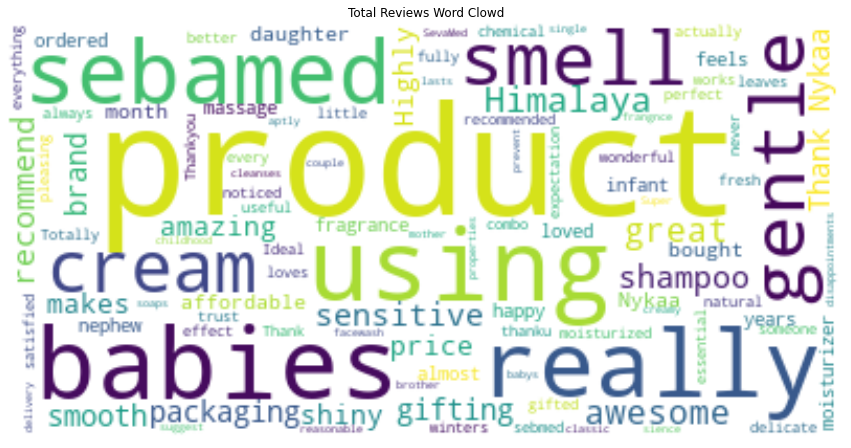

In [28]:
import matplotlib.pyplot as plt
# join all positive reviews
text = " ".join(review for review in posReviewsList[:100])


 
# Generate the image
wordcloud = WordCloud(stopwords=stopwords, background_color="white", max_words=100, min_word_length=5).generate(text)
 
# visualize the image
fig=plt.figure(figsize=(15, 8))
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis("off")
plt.title('Total Reviews Word Clowd')
plt.show()

In [29]:
negReviewsList

['It had no much lather.... But good job',
 'My babies hair became soft and shiny after using this shampoo.',
 "I had heavy hair fall which reduced to great extent after using this shampoo from last one year It's worth of money! I am using it regularly for more than a year now and I think my hair volume is now more..",
 'Chemical free trusted brand Himalaya baby ....good for baby nd good for uhh \r\r',
 'All stuffs for babay came in one jar...',
 "i didn't like its packaging, but overall products inside are good.",
 "All the items in the basket are useful for the baby and the basket is very cute but the basket doesn't have a lid it comes with plastic cover.",
 'My baby had less hair when he was born... i used pure coconut oil too but no improvement. Then came this avacado baby hair oil....it worked wonders on my baby. ',
 "It's a very light oil to use after shampoo. Doesn't weigh down serum ",
 'I am having very dry skin especially on legs.  I had tried every skin lotion meant for extr

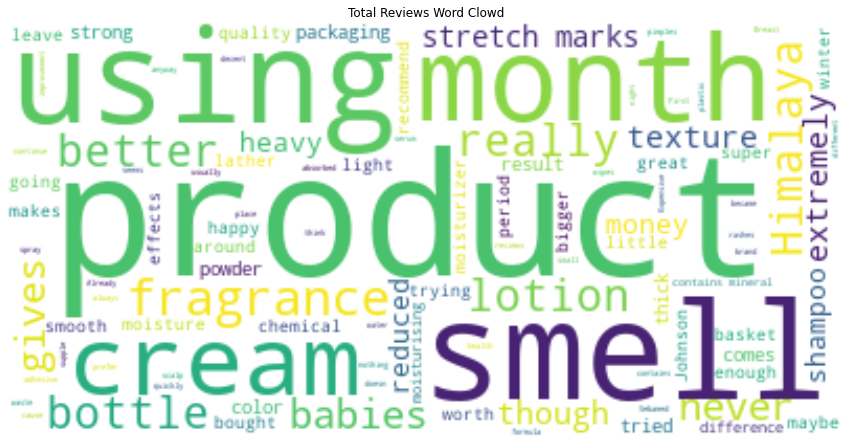

In [30]:
import matplotlib.pyplot as plt
# join all positive reviews
text1 = " ".join(review for review in negReviewsList[:100])


 
# Generate the image
wordcloud = WordCloud(stopwords=stopwords, background_color="white", max_words=100, min_word_length=5).generate(text1)
 
# visualize the image
fig=plt.figure(figsize=(15, 8))
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis("off")
plt.title('Total Reviews Word Clowd')
plt.show()